## Homework 4: Fourier Analysis

## Due date: 

### Student Name:

**Exercise 1.**

a.- Find the Fourier series of the function $f(x) := x$ in the
interval $[-\pi,\pi]$.

b.- Use Parseval's relation to prove that 
\begin{equation*}
  \sum_{n=1}^{\infty} \frac{1}{n^2} = \pi^2/6
\end{equation*}




**Exercise 2.**

a.- Find the Fourier series of the function $f(x):= e^{sx}$ in the
interval $[-\pi, \pi]$.

b.- Use Parseval's relation to prove that 
\begin{equation*}
  \pi coth(\pi s)/s = \sum_{n=-\infty}^{\infty} \frac{1}{s^2+n^2}
\end{equation*}




**Exercise 3.**

Let $S_n: L^2 \to L^2$ be the map that sends $f \in L^2$ to the partial
Fourier series,
\begin{equation*}
  S_n(f) := \sum_{m=-n}^{n} c_m e^{imx}, \;\;\;\;\;\;\; 
                 c_m:= \frac{1}{2\pi}\langle e^{imx},f(x) \rangle.
\end{equation*}
Show that the $S_n$ are orthogonal projections and that 
$S_n S_m = S_m S_n = S_m$ if $m \leq n$.



**Exercise 4. Use of the Fourier Interpolation**

Compute the Fourier Interpolation of the functions of above (for $s= 1, 3, 3i$) and plot it along the Fourier series coefficients. Below is an example:

In [1]:
using Pkg
Pkg.instantiate()
using FFTW
using Plots

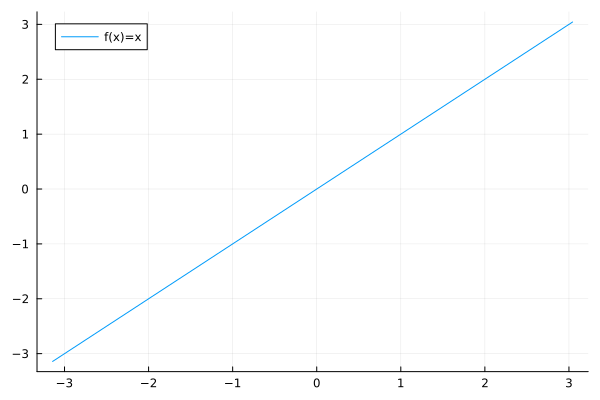

In [3]:
N = 64
f(x) = x
#f(x) = x*sign(x)
#f(x) = exp(2*x)
xi = -π
xf = π
xv = [xi + (xf-xi)*(i-1)/N for i in 1:N]
fv = f.(xv)
plot(xv,fv, label="f(x)=x")

The Fourier coefficients of $f(x)=x$ in the interval $[-π,π]$ are $b_n=i/n$, $n\neq 0$, $b_0 = 0$. While the Fourier Interpolant is: $i_n = 1/(e^{-i2πn}-1)$. 

For $f(x)=xsign(x)$ we have: $a_n = 2N/n^2/π$ and $in =  $

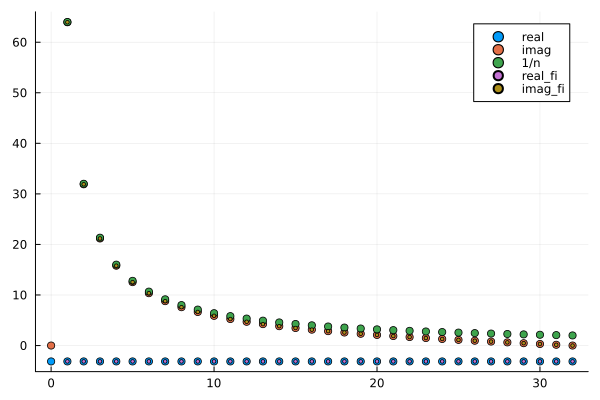

In [4]:
freq = fftshift(rfftfreq(N))*N
rft = rfft(fv)
#fftf = fft(fv)
bn = N ./freq #(-1).^(freq*N) ./freq #for f(x)=x
an = 1 ./ (freq.^2)/N/π*2 #for f(x)=x*sign(x)
in = 2*π ./( exp.(-im*2*π*freq/N) .- 1)
scatter(freq,real.(rft), label="real", markersize=4)
scatter!(freq,imag.(rft), label="imag")
scatter!(freq,bn, label = "1/n" )#"(-1)^n/n")
#scatter!(freq,an, label="2N/π/n^2")
scatter!(freq,real.(in), label="real_fi", markersize=2)
scatter!(freq,imag.(in), label="imag_fi", markersize=2)
#scatter!(freq,imag.(fftf))
#scatter!(freq,real.(fftf))

In [26]:
xv;

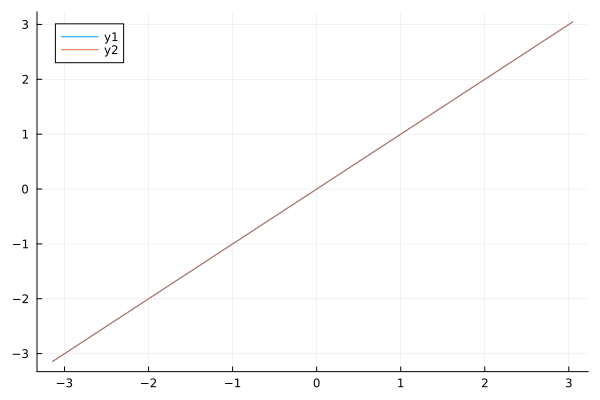

In [41]:
plot(xv,irfft(rft,N))
plot!(xv,fv)

In [5]:
"""
construct the Fourier Interpolant for functions in the range [-pi,pi] with N points
"""
function fourier_interpolant_f_x(f,N=64)
    # Step 1: Discretize |x| on [-π, π]
    x_k = LinRange(-π, π, N+1)[1:end-1]  # N points (exclude duplicate endpoint)
    f_k = f.(x_k)

    # Step 2: Compute DFT coefficients (normalized)
    F_n = fft(f_k) / N

    # Step 3: Reorder frequencies for trigonometric interpolant
    # Shift zero frequency to center (for plotting/analysis)
    F_n_shifted = fftshift(F_n)
    #n = rfftfreq(N)*N
    n = fftshift(fftfreq(N)) * N  # Frequencies: [-32, -31, ..., 0, ..., 31, 32]

    # Step 4: Define the interpolant function
    function P(x)
        sum = 0.0 + 0.0im
        for (i, n_val) in enumerate(n)
            sum += F_n_shifted[i] * exp(-im * n_val * x)
            #sum += F_n[i] * exp(im * n_val * x)
        end
        real(sum)  # Return real part (imaginary part is zero for even functions)
    end
return P
end


fourier_interpolant_f_x

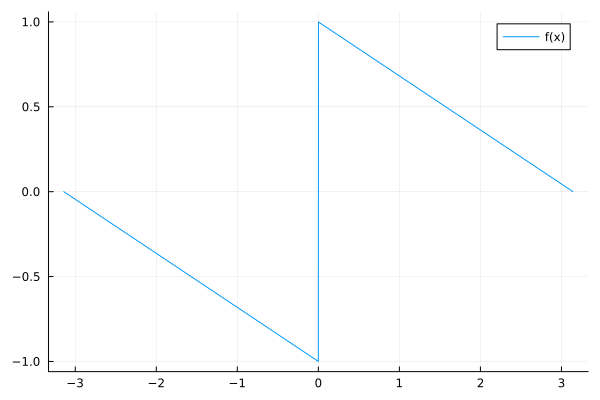

In [21]:
#f(x) = sign(x)
f(x) = -((x+π)*(1-sign(x)) + (x-π)*(sign(x)+1)) /2/π
#f(x) = sin(x) + sin(3*x)/3 + sin(5*x)/5
plot(f, -π, π, label="f(x)")


In [22]:
N=64
P=fourier_interpolant_f_x(f,N)
xv_N = [-π + (i-1)*(2π)/N for i in 1:N ]
fft(f.(xv_N));

In [199]:
P.(xv_N);

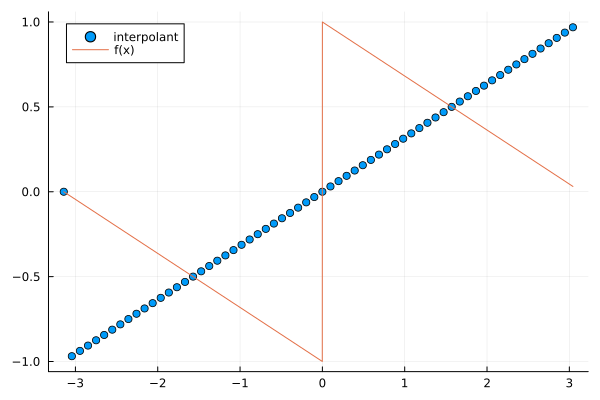

In [23]:
scatter(xv_N,P.(xv_N), label="interpolant")
plot!(f, label="f(x)")

In [201]:
fftshift(fftfreq(N)) * N


-32.0:1.0:31.0

In [202]:
rfftfreq(N)*N

33-element Frequencies{Float64}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
  ⋮
 24.0
 25.0
 26.0
 27.0
 28.0
 29.0
 30.0
 31.0
 32.0

In [209]:
"""
Construct the Fourier Interpolant for a function `f` in the range [-π, π] with N points.
"""
function fourier_interpolant_f_x_2(f, N=65)
    # Step 1: Discretize x on [-π, π] with N points (exclude duplicate endpoint)
    x_k = LinRange(-π, π, N+1)[1:end-1]
    f_k = f.(x_k)  # Sample the function at these points

    # Step 2: Compute DFT coefficients (normalized)
    F_n = fft(f_k) / N

    # Step 3: Define the Fourier interpolant function
    function P(x)
        sum = 0.0 + 0.0im
        for n in 0:(N ÷ 2 - 1)  # Positive frequencies
            sum += F_n[n + 1] * exp(-im * n * x)
        end
        for n in -(N ÷ 2):-1  # Negative frequencies
            index = mod(n, N) + 1
            sum += F_n[index] * exp(-im * n * x)
        end
        return real(sum)  # Return the real part
    end

    return P
end

fourier_interpolant_f_x_2

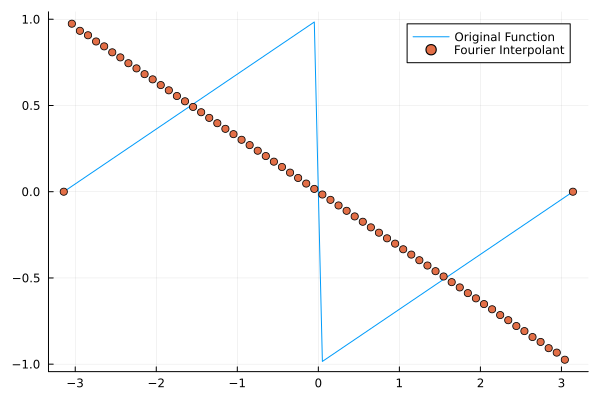

In [211]:
# Define a test function
#f(x) = sin(x) + 0.5cos(2x)
#f(x) = sign(x)

# Construct the Fourier interpolant
P = fourier_interpolant_f_x_2(f, 64)

# Evaluate the interpolant at some points
x_vals = LinRange(-π, π, 64)
y_vals = P.(x_vals)

# Plot the original function and the interpolant
using Plots
plot(x_vals, f.(x_vals), label="Original Function")
scatter!(x_vals, y_vals, label="Fourier Interpolant", linestyle=:dash)